In [1]:
import pygrank as pg
import fairbench as fb

The default pygrank backend has been set to "numpy" by the file C:\Users\manio\.pygrank\config.json
Set your preferred backend as one of ["numpy", "pytorch", "tensorflow", "torch_sparse", "matvec", "sparse_dot_mkl"] and "reminder": false in that file to remove this message from future runs.


In [4]:
_, graph, communities = next(pg.load_datasets_multiple_communities(["highschool"]))
train, test = pg.split(pg.to_signal(graph, communities[0]), 0.5)
sensitive_signal = pg.to_signal(graph, communities[1])
labels = test.filter(exclude=train)
sensitive_attribute = sensitive_signal.filter(exclude=train)

REQUIRED CITATION: Please visit the url http://www.sociopatterns.org/datasets/high-school-contact-and-friendship-networks for instructions on how to cite the dataset highschool in your research


In [9]:
sensitive = fb.Fork(gender=fb.categories @ sensitive_attribute)
sensitive

gender0.0,[1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1]
gender1.0,[0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0]


In [10]:
algorithm = pg.PageRank(alpha=0.85)
scores = algorithm(train).filter(exclude=train)
scores

array([0.08441262, 0.09228937, 0.10078006, 0.05443014, 0.09033315,
       0.09365017, 0.10861075, 0.06738911, 0.07250801, 0.08408919,
       0.10651925, 0.0570073 , 0.10775795, 0.06393586, 0.08494535,
       0.07769155, 0.09414253, 0.11834839, 0.08759787, 0.08846908,
       0.11369663, 0.05320497, 0.09673177, 0.0733297 , 0.10710138,
       0.13318806, 0.09332352, 0.06970426, 0.07100357, 0.05812314,
       0.10177231, 0.07546912, 0.09470125, 0.03422945, 0.03703833,
       0.01710846, 0.03111027, 0.01458516, 0.01695388, 0.01689512,
       0.03710284, 0.07036256, 0.01565964, 0.0171823 , 0.00939737,
       0.02108168, 0.01090504, 0.01444807, 0.0097317 , 0.01244548,
       0.01023392, 0.01857298, 0.01328622, 0.0147618 , 0.01245283,
       0.01143013, 0.01193768, 0.01120722, 0.02515559, 0.0160504 ,
       0.01283806, 0.0073031 , 0.01919921, 0.01234127, 0.01254129,
       0.01244651, 0.01459912, 0.01273068, 0.01466043, 0.01582932,
       0.01040348, 0.01404293, 0.00924871, 0.02774275, 0.13350

In [18]:
report = fb.multireport(labels=labels, scores=scores, sensitive=sensitive, top=50)
report

auc,0.680
phi,0.030
tophr,0.040
toprec,1.000
avghr,0.005
avgrepr,0.556
auc,0.780
phi,0.041
tophr,0.084
toprec,1.000
avghr,0.016


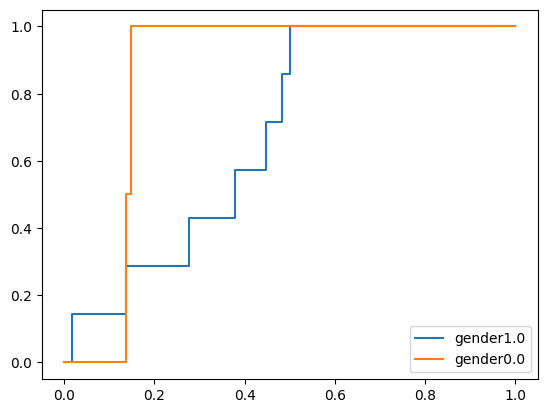

In [19]:
fb.visualize(report.maxbarea.auc.explain.explain.curve)

In [23]:
fair_algorithm = pg.LFPR(alpha=0.85, redistributor="original")
fair_scores = fair_algorithm(train, sensitive=sensitive_signal).filter(exclude=train)
fair_report = fb.multireport(
    labels=labels, scores=fair_scores, sensitive=sensitive, top=50
)

In [25]:
combined = fb.Fork(ppr=report, lfpr=fair_report)
combined

ppr,min: auc: 0.680 phi: 0.030 tophr: 0.040 toprec: 1.000 avghr: 0.005 avgrepr: 0.556 wmean: auc: 0.780 phi: 0.041 tophr: 0.084 toprec: 1.000 avghr: 0.016 avgrepr: 1.000 minratio: auc: 0.792 phi: 0.540 tophr: 0.286 toprec: 1.000 avghr: 0.147 avgrepr: 0.355 maxdiff: auc: 0.178 phi: 0.025 tophr: 0.100 toprec: 0.000 avghr: 0.026 avgrepr: 1.011 maxbarea: auc: 0.169 phi: --- tophr: --- toprec: --- avghr: 0.035 avgrepr: 1.083 maxbdcg: auc: 0.184 phi: --- tophr: --- toprec: --- avghr: 0.047 avgrepr: 1.094
lfpr,min: auc: 0.589 phi: 0.039 tophr: 0.040 toprec: 1.000 avghr: 0.005 avgrepr: 0.984 wmean: auc: 0.743 phi: 0.040 tophr: 0.084 toprec: 1.000 avghr: 0.012 avgrepr: 1.000 minratio: auc: 0.681 phi: 0.941 tophr: 0.286 toprec: 1.000 avghr: 0.227 avgrepr: 0.972 maxdiff: auc: 0.276 phi: 0.002 tophr: 0.100 toprec: 0.000 avghr: 0.016 avgrepr: 0.028 maxbarea: auc: 0.262 phi: --- tophr: --- toprec: --- avghr: 0.025 avgrepr: 0.518 maxbdcg: auc: 0.276 phi: --- tophr: --- toprec: --- avghr: 0.024 avgrepr: 0.705


In [28]:
fb.interactive(combined)

Loading BokehJS ...

In [21]:
fb.auc(scores=scores, sensitive=sensitive)

gender1.0,0.680
gender0.0,0.858


In [22]:
value = fb.areduce(
    fb.auc(labels=labels, scores=scores, sensitive=sensitive),
    reducer=fb.reducers.max,
    expand=fb.expanders.barea,
)
value

0.1688311688311688

In [ ]:
report = fb.Fork(auc=fb.reduce(fb.auc(scores=scores, labels=labels, sensitive=sensitive), fb.reducers.max, fb.expanders.barea))
report